# CNN and RNN for engine temperature modelling

Let's import the needed packages :

In [ ]:
import pandas as pd # for data storage
import tensorflow as tf # for deep learning model creation
import matplotlib.pyplot as plt # to plot the evolution of the training metrics
import numpy as np

## Import the data from txt files

Our data are available on txt files. We can import them easily using Pandas :

In [ ]:
x_1 = pd.read_csv('train_example_x_resample_1hz.txt', sep=",", header=None)
y_1 = pd.read_csv('train_example_y_resample_1hz.txt', sep=",", header=None)

Let's check what they look like :

In [ ]:
x_1.head()

,0,1,2,3,4,5,6,7
0,0.0,1208,0,311.29,0,0,0,-12.75
1,0.0,1208,0,311.20,0,0,0,-12.75
2,0.0,1208,0,311.20,0,0,0,-12.75
3,0.0,1208,0,311.29,0,0,0,-12.75
4,0.0,1208,0,311.29,0,0,0,-12.75


In [ ]:
y_1.head()

,0
0,-9.75
1,-9.75
2,-9.75
3,-9.75
4,-9.75


We can also check the sizes of the data :

In [ ]:
print(x_1.shape)
print(y_1.shape)

(300, 8)
(300, 1)


In [ ]:
x_1 = x_1.to_numpy()

In [ ]:
y_1 = y_1.to_numpy()

In [ ]:
x_1.shape

(300, 8)

In [ ]:
y_1.shape

(300, 1)

Now we imported the dataset, we can build our models.

FAKE DATASET, ONLY TO CHECK IF MODELS START TRAINING

In [ ]:
x = np.array([x_1, x_1, x_1, x_1, x_1])
y = np.array([y_1, y_1, y_1, y_1, y_1])

In [ ]:
x.shape

(5, 300, 8)

## Creation of the CNN model

N.B. : We can ajust filtres and pool_size

In [ ]:
model = tf.keras.models.Sequential() # First we have to create model

We start we two convolutional layers :


In [ ]:
model.add(tf.keras.layers.Conv1D(64, kernel_size=3,
                 activation='relu',
                 input_shape=(300, 8)))

model.add(tf.keras.layers.Conv1D(64, 
                 kernel_size=3, 
                 activation='relu'))

We add a pooling layer :

In [ ]:
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

We can add a Dropout to prevent our model from overfitting, but it may not be necessary, we will see it while training the model. For now let's keep it as a comment.

In [ ]:
# model.add(tf.keras.layers.Dropout(0.2))

After the pooling we need to flattent the data :

In [ ]:
model.add(tf.keras.layers.Flatten())

Now we add 3 fully connected layers. This parameter can be optimized, you can try Bayesian optimisation (SMBO) or gridsearch.

In [ ]:
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

Let's now create the output layer :

In [ ]:
model.add(tf.keras.layers.Dense(300, activation='sigmoid'))

Wa can print a summary of our model :

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 298, 64)           1600      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 296, 64)           12352     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 148, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 9472)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                606272    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

We have to compile the model :

In [ ]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mse"]
)

And now we can fit it.

In [ ]:
history = model.fit(x, y, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 70.5816 - mse: 70.5816 - val_loss: 71.3190 - val_mse: 71.3190
Epoch 2/10
1/1 [==============================] - 0s 49ms/step - loss: 71.3190 - mse: 71.3190 - val_loss: 70.9029 - val_mse: 70.9029
Epoch 3/10
1/1 [==============================] - 0s 53ms/step - loss: 70.9028 - mse: 70.9028 - val_loss: 70.5039 - val_mse: 70.5039
Epoch 4/10
1/1 [==============================] - 0s 50ms/step - loss: 70.5039 - mse: 70.5039 - val_loss: 70.2594 - val_mse: 70.2594
Epoch 5/10
1/1 [==============================] - 0s 54ms/step - loss: 70.2594 - mse: 70.2594 - val_loss: 70.3056 - val_mse: 70.3056
Epoch 6/10
1/1 [==============================] - 0s 47ms/step - loss: 70.3056 - mse: 70.3056 - val_loss: 70.1228 - val_mse: 70.1228
Epoch 7/10
1/1 [==============================] - 0s 51ms/step - loss: 70.1228 - mse: 70.1228 - val_loss: 70.1077 - val_mse: 70.1077
Epoch 8/10
1/1 [==============================] - 0s 52ms/step - loss: 

Once the training is over, you can check the model's performances :

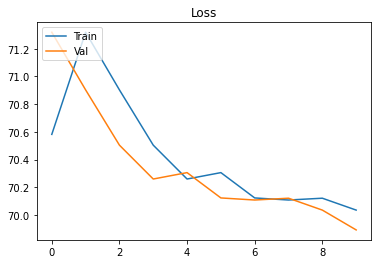

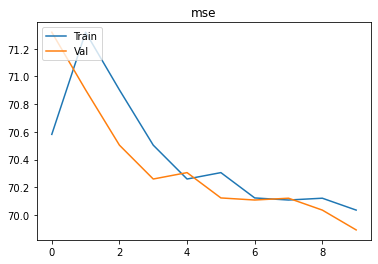

In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["mse"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_mse"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("mse")
plt.show()

## Creation of the RNN model

First we reshape x_1 :

In [ ]:
x_lstm = x_1.reshape((1, 300, 8))

In [ ]:
x_lstm.shape

(1, 300, 8)

Let's build the architecture of the model :

In [ ]:
model_lstm = tf.keras.models.Sequential()

model_lstm.add(tf.keras.layers.LSTM(32, input_shape=(300, 8)))
# model.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.Dense(64, activation='relu'))
model_lstm.add(tf.keras.layers.Dense(300, activation='sigmoid'))

We can compile the model now :

In [ ]:
model_lstm.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mse"]
)

And finally we can fit x and y :

In [ ]:
history = model_lstm.fit(x, y, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 70.2858 - mse: 70.2858 - val_loss: 70.2310 - val_mse: 70.2310
Epoch 2/10
1/1 [==============================] - 0s 118ms/step - loss: 70.2310 - mse: 70.2310 - val_loss: 70.1855 - val_mse: 70.1855
Epoch 3/10
1/1 [==============================] - 0s 126ms/step - loss: 70.1855 - mse: 70.1855 - val_loss: 70.1406 - val_mse: 70.1406
Epoch 4/10
1/1 [==============================] - 0s 132ms/step - loss: 70.1406 - mse: 70.1406 - val_loss: 70.0951 - val_mse: 70.0951
Epoch 5/10
1/1 [==============================] - 0s 133ms/step - loss: 70.0951 - mse: 70.0951 - val_loss: 70.0488 - val_mse: 70.0488
Epoch 6/10
1/1 [==============================] - 0s 122ms/step - loss: 70.0488 - mse: 70.0488 - val_loss: 70.0014 - val_mse: 70.0014
Epoch 7/10
1/1 [==============================] - 0s 120ms/step - loss: 70.0014 - mse: 70.0014 - val_loss: 69.9528 - val_mse: 69.9528
Epoch 8/10
1/1 [==============================] - 0s 123ms/step -

Let's take a look at our model performances :

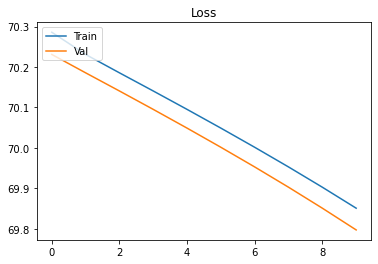

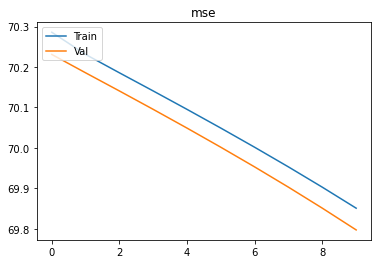

In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["mse"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_mse"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("mse")
plt.show()